<a href="https://colab.research.google.com/github/Jinzhao-Yu/BioStat615/blob/main/BIOSTAT615_Lecture_6_Fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOSTAT615 Lecture 6 - R

## 1. Linear Interpolation

In [1]:
#' linear interpolation between two points
#' @param (x1,y1) - (x,y) coordinates of one point
#' @param (x2,y2) - (x,y) coordinate of another point
#' @return A vector of c(y_intercept, slope)
linear.interpolation <- function (x1 , y1 , x2 , y2) {
  m <- (y2 - y1) / (x2 - x1)
  b <- y2 - m * x2
  return (c(b, m))  # return the coefficients
}

In [2]:
#' evaluate polynomial function
#' @param x - A vector of x-coordinates to evaluate
#' @param coefs - Polynomial coefficient c(intercept,1st,2nd,...)
#' @return A vector of predicted values from the polynomial
eval.poly <- function(x,coefs){
  y <- rep (0, length (x))
  for(i in length(coefs):1L)
    y <- coefs [i] + x * y    ## can you understand why this implements polynomial?
  return (y)
}

`eval.poly()` calculates polynomial usinga recursive formula.

$$\begin{array}{ll}
y_0 & = 0 \\
y_i & = x y_{i-1} + b_{n-i+1} 
\end{array}$$

Then, we have the following value of $y_i$ in each iteration

$$\begin{array}{ll}
y_0 &= 0 \\
y_1 &= b_n \\
y_2 &= b_n x + b_{n-1}\\
y_3 &= b_n x^2 + b_{n-1}x + b_{n-2}\\
& \cdots \\
y_n &= b_n x^n + b_{n-1}x^{n-1} + \ldots + b_1x + b_0
\end{array}$$ 

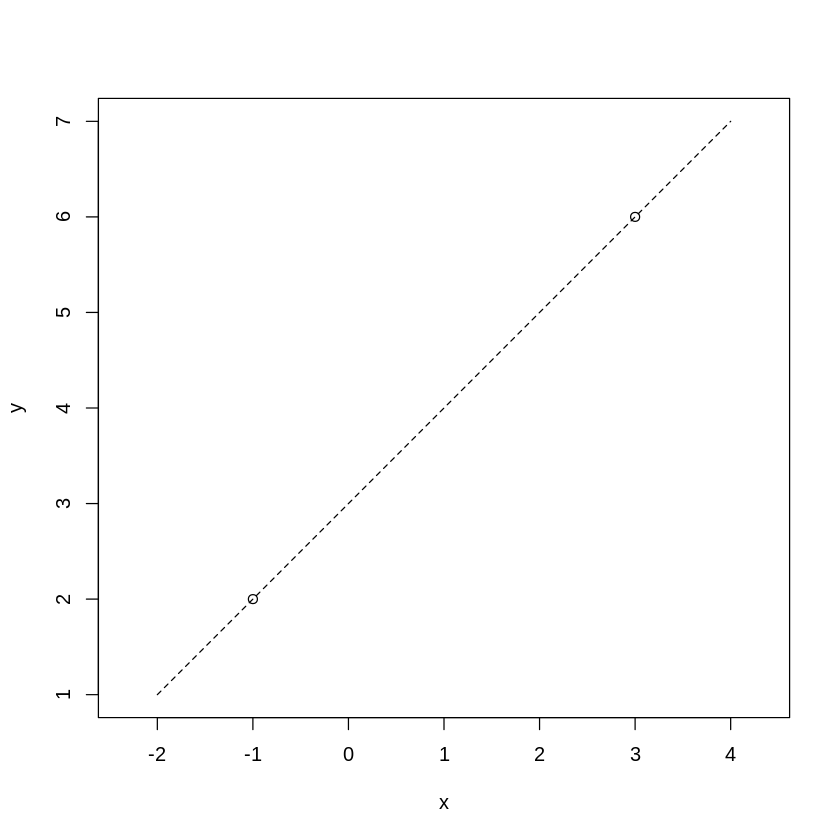

In [3]:
## Example of linear interpolation with two points
x1 = -1; y1 = 2; 
x2 = 3; y2 = 6;   # NOTE : slope is exactly 1

## create x, y values to evaluate the function
x <- seq(x1-1,x2+1,length=100)
y <- eval.poly(x,linear.interpolation(x1,y1,x2,y2))

## draw the original points and interpolated values 
plot(x,y,type="l",lty=2,asp=1)
points(x1,y1)
points(x2,y2)

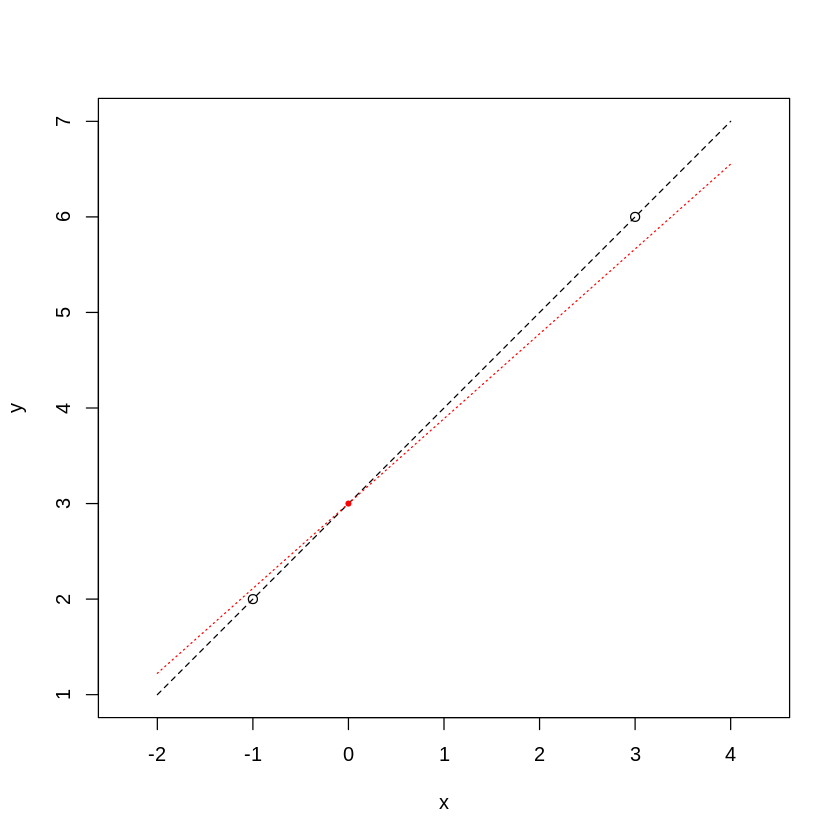

In [4]:
## Copy the example above
x1 = -1; y1 = 2; 
x2 = 3; y2 = 6;  
x <- seq(x1-1,x2+1,length=100)
y <- eval.poly(x,linear.interpolation(x1,y1,x2,y2))
plot(x,y,type="l",lty=2,asp=1)
points(x1,y1)
points(x2,y2)

## Examples where two points are very close to each other
## define new (x3, y3) and (x4, y4) that are very close
x3=0; y3=3;
x4=x3+1e-15; y4=y3+1e-15; ## NOTE: slope should be still 1

## create y1 values to evaluate the interpolated function
y1 = eval.poly(x,linear.interpolation(x3,y3,x4,y4))

## draw the new points and interpolated values
points(x3,y3,col="red",pch=19,cex=0.5)
points(x4,y4,col="red",pch=19,cex=0.5)
lines(x,y1,type="l",lty=3,col="red")

## 2. Higher-Order Polynomial interpolation

In [5]:
#' poly.interpolation() - polynomial interpolation
#' @param x - list of x values to fit polynomial
#' @param y - list of y values to fit polynomial
#' @return coefficients of polynomial 
poly.interpolation <- function (x, y) {
  if( length (x) != length (y))
    stop (" Length of x and y vectors must be the same ")
  n <- length (x)
  vandermonde <- matrix(rep (1, n*n),nrow=n,ncol=n)
  xi = vandermonde[,1]
  for(i in 2:n) {
    xi <- xi*x
    ## can you understand how vandermode matrix is constructed?
    vandermonde[,i] <- xi   
  }
  beta <- solve(vandermonde, y)
  return(as.vector(beta))
}

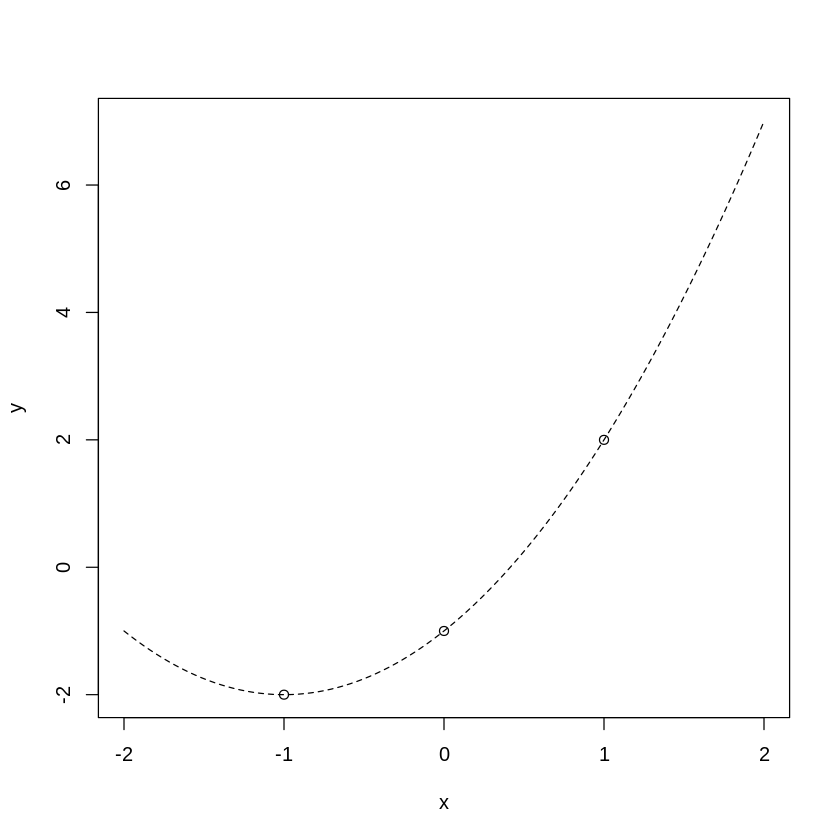

In [6]:
## polynomial fit with three points 
x_obs <- c(-1, 0, 1)
y_obs <- c(-2, -1, 2)

## perform polynomial interpolation on the three points
poly_coef <- poly.interpolation(x_obs, y_obs)

## generate 100 points to visualize interpolated poynomial
x <- seq(-2,2,length=100)
y <- eval.poly(x, poly_coef)

## visualize original and interpolated values
plot(x,y,type="l",lty=2)
points(x_obs,y_obs)

## 3. Approximation Errors

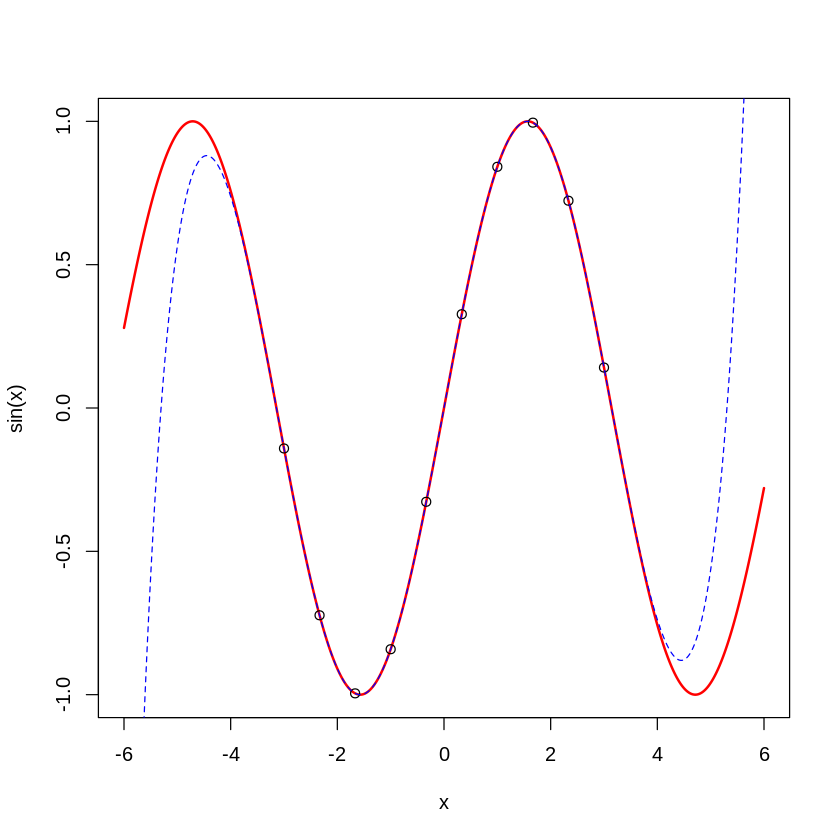

In [7]:
## polynomial fit with 10 observed points 
x_obs <- seq(-3,3,length=10) # 10 observed points
y_obs <- sin(x_obs)          # intended function is sin(x)

## perform polynomial interpolation on the 10 points
poly_coef <- poly.interpolation(x_obs, y_obs)

## generate 1000 points to visualize interpolated poynomial
x <- seq(-6,6,length=1000)
y <- eval.poly(x, poly_coef)

## visualize intended function sin(x)
plot(x,sin(x),col="red",type="l",lwd=2)
## visualize the 10 anchor points
points(x_obs,y_obs) 
## visualize fitted values
lines(x,y,type="l",lty=2,col="blue")

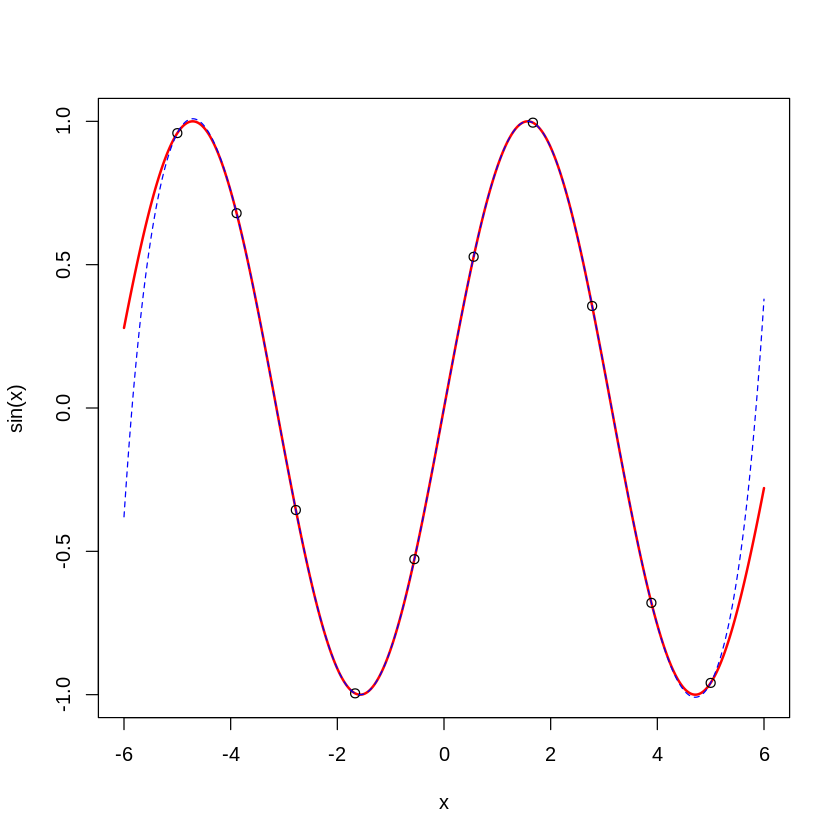

In [8]:
## Repeat exactly the same thing, with wider range
## polynomial fit with 10 observed points 
x_obs <- seq(-5,5,length=10) # ONLY DIFFERENCE from the previous example
y_obs <- sin(x_obs)          # intended function is sin(x)

## perform polynomial interpolation on the 10 points
poly_coef <- poly.interpolation(x_obs, y_obs)

## generate 1000 points to visualize interpolated poynomial
x <- seq(-6,6,length=1000)
y <- eval.poly(x, poly_coef)

## visualize intended function sin(x)
plot(x,sin(x),col="red",type="l",lwd=2)
## visualize the 10 anchor points
points(x_obs,y_obs) 
## visualize fitted values
lines(x,y,type="l",lty=2,col="blue")

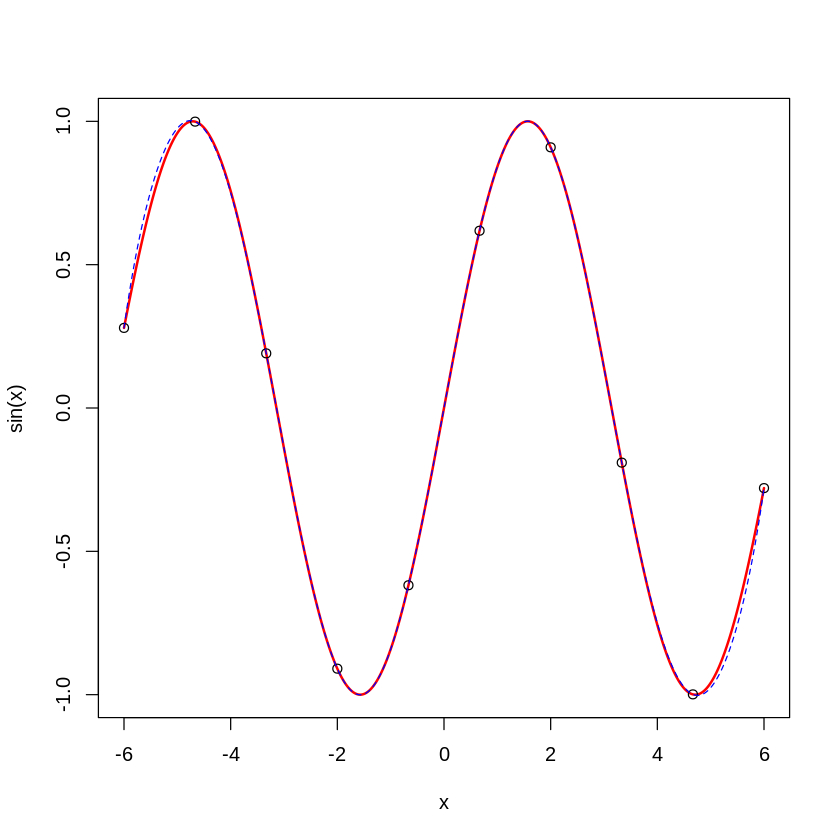

In [9]:
## Repeat exactly the same thing, with even wider range
## polynomial fit with 10 observed points 
x_obs <- seq(-6,6,length=10) # ONLY DIFFERENCE from the previous example
y_obs <- sin(x_obs)          # intended function is sin(x)

## perform polynomial interpolation on the 10 points
poly_coef <- poly.interpolation(x_obs, y_obs)

## generate 1000 points to visualize interpolated poynomial
x <- seq(-6,6,length=1000)
y <- eval.poly(x, poly_coef)

## visualize intended function sin(x)
plot(x,sin(x),col="red",type="l",lwd=2)
## visualize the 10 anchor points
points(x_obs,y_obs) 
## visualize fitted values
lines(x,y,type="l",lty=2,col="blue")

## 4. Runge's phenomenon

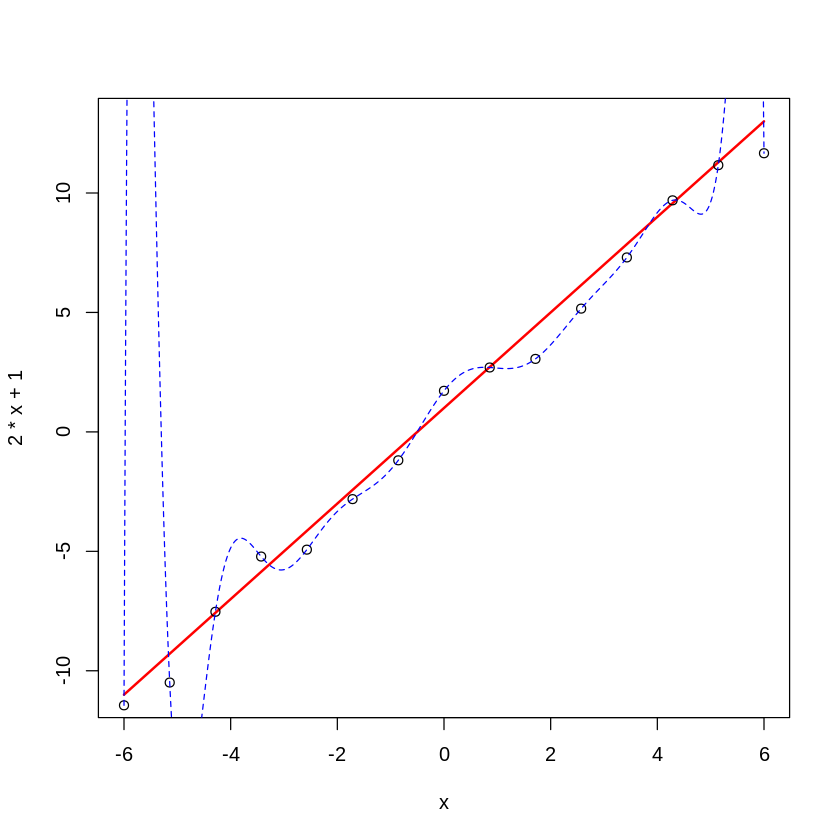

In [10]:
## polynomial fit with 15 observed points with some randomness
## Runge's phenomenon
set.seed(1000) ## this is just for reproducible results
x_obs <- seq(-6,6,length=15) # 15 points between -6 and 6
y_obs <- 2*x_obs+1 + rnorm(length(x_obs)) # y=2x+1 with randomness

## perform polynomial interpolation on the 10 points
poly_coef <- poly.interpolation(x_obs, y_obs)

## generate 1000 points to visualize interpolated poynomial
x <- seq(-6,6,length=1000)
y <- eval.poly(x, poly_coef)

## visualize intended function 2x+1
plot(x,2*x+1,col="red",type="l",lwd=2)
## visualize the 10 anchor points
points(x_obs,y_obs) 
## visualize fitted values
lines(x,y,type="l",lty=2,col="blue")

## 5. Piecewise Linear Interpolation

In [11]:
#' piecewise.linear.interpolation()
#' @param x A vector of observed x-coordinates
#' @param y A vector of observed y-coordinates
#' @return A dataframe containing the following attributes
#'    * x : x-values interpolated (2nd to last)
#'    * b : y-intercepts for each interval line
#'    * m : slope for each interval
piecewise.linear.interpolation  = function(x,y){
  n = length(x)
  od_x = order(x)
  y = y[od_x] # reorder y based on x values
  x = x[od_x] # reorder x in the same way
  m = diff(y)/diff(x) # slopes between two nearby points
  b = y[-1] - m*x[-1] # y-intercepts from 2nd to last points
  return(cbind(x=x[-1],b,m))
}

In [12]:
#' eval.piecewise.poly()
#' @param x     A vector of x-coordinates to be evaluated
#' @param coefs Data frames containing (x, b, m)
#' @return A vector of y-coordinates linearly interpolated
eval.piecewise.poly <- function(x,coefs){
   n = nrow(coefs)
   x_bound = c(-Inf,coefs[-n,"x"],Inf) # Make n intervals
   y = rep(NA,length=length(x)) 
   for(i in 1:n){
     # select x points that fall into i-th interval
     idx = which((x <= x_bound[i+1]) & (x > x_bound[i])) 
     y[idx] = eval.poly(x[idx],coefs[i,c("b","m")]) # apply interpolation
   }
   return(y)
 }

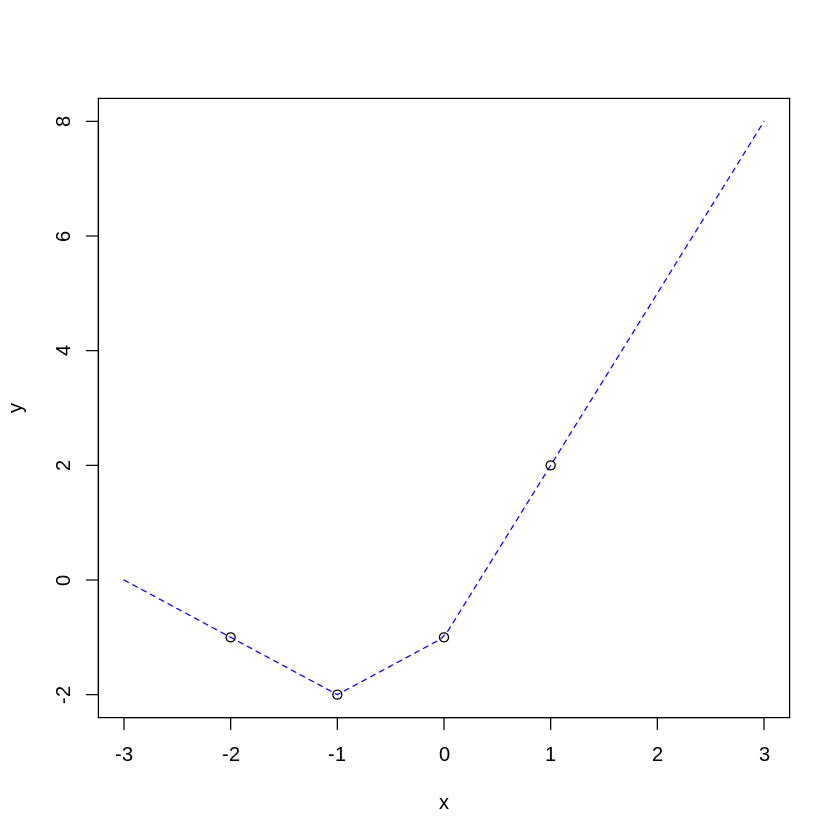

In [13]:
x_obs <- c(-1, 0, 1,-2)   # 4 observed points
y_obs <- c(-2, -1, 2,-1)

## perform polynomial interpolation on the 10 points
pwl_coef <- piecewise.linear.interpolation(x_obs, y_obs)

## generate 1000 points to visualize interpolated poynomial
x <- seq(-3,3,length=100)
y <- eval.piecewise.poly(x, pwl_coef)

## Visualize anchor points and fitted values
plot(x,y,type="l",lty=2,col="blue")
points(x_obs,y_obs)

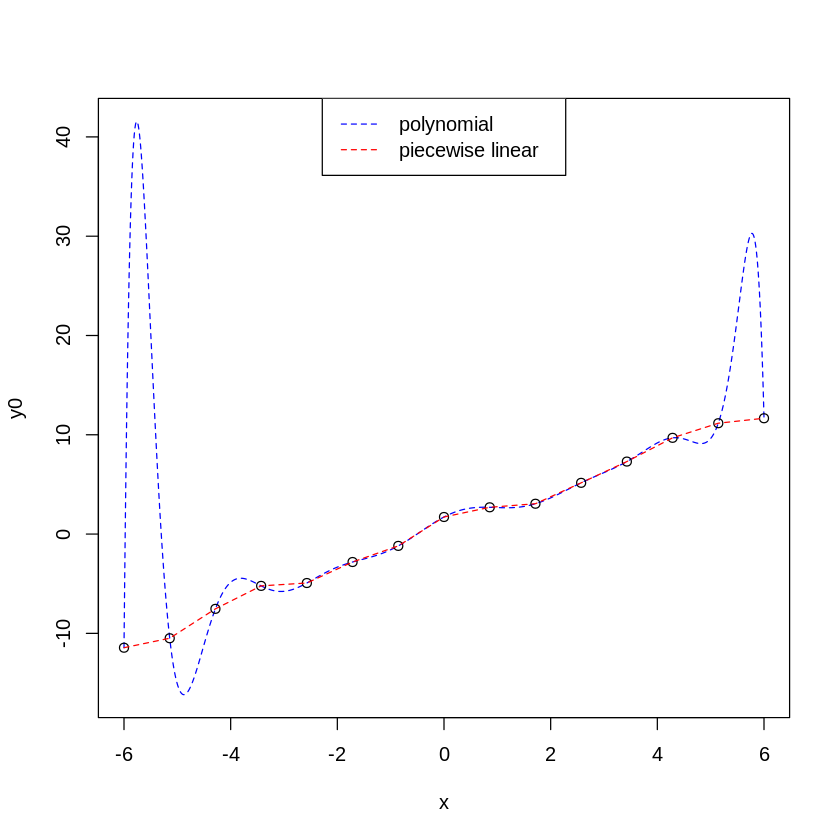

In [14]:
## Revisiting Runge's phenomenon
set.seed(1000) ## this is just for reproducible results
x_obs <- seq(-6,6,length=15) # 15 points between -6 and 6
y_obs <- 2*x_obs+1 + rnorm(length(x_obs)) # y=2x+1 with randomness

## perform polynomial interpolation on the 10 points
pwl_coef <- piecewise.linear.interpolation(x_obs, y_obs)
poly_coef <- poly.interpolation(x_obs, y_obs)

## generate 1000 points to visualize interpolated poynomial
x <- seq(-6,6,length=1000)
y <- eval.piecewise.poly(x, pwl_coef)
y0 <- eval.poly(x, poly_coef)

## visualize polynomial interpolation
plot(x,y0,col="blue",type="l",lty=2)
## visualize the 10 anchor points
points(x_obs,y_obs) 
## visualize piecewise interpolation
lines(x,y,lty=2,col="red")
## show the legend
legend("top",c("polynomial","piecewise linear"),lty=2,col=c("blue","red"))

## 6. Natural Cubic Splines

In [15]:
#' tridiagmatrix() - solve cubine splines
#' @param L, D, U, b - vectors for the equations
#' @return solution for x
tridiagmatrix <- function (L, D, U, b) {
  n <- length (D)
  ## The forward sweep - redefine U and b
  U[1] <- U[1] / D[1]
  b[1] <- b[1] / D[1]
  if(n>2){
    for(i in 2:(n - 1)) {
      U[i] <- U[i] / (D[i] - L[i-1] * U[i - 1])
      b[i] <- (b[i] - L[i-1] * b[i - 1]) / (D[i] - L[i-1] * U[i - 1])
    }
  }
  b[n] <- (b[n] - L[n-1] * b[n - 1]) / (D[n] - L[n-1] * U[n - 1])
  ## The backward sweep - solve x
  x <- rep(0, n)
  x[n] <- b[n]
  if(n>1){
    for(i in (n - 1):1)
      x[i] <- b[i] - U[i] * x[i + 1]
  }
  return (x)
}

In [16]:
#' cubic.spline() - fit a cubin spline
#' @param x, y - coordinatess of observed values
#' @return A function that performs spline fitting
cubic.spline <- function (x, y) {
  n <- length (x)
  if(n==0 | length(x)!=length(y))
    stop("Not valid input data!")
  ## reorder x and y
  od = order(x)
  x = x[od]
  y = y[od]

  h <- diff(x)
  delta <- diff(y)/h
  g <- h[-1]+h[-(n-1)]
  v <- delta[-1] - delta[-(n-1)]
  a0 <- y[-n]
  a2 <- c(0,tridiagmatrix(h[-c(1,(n-1))] , 2*g , h[-c(1,n-1)] , 3*v))
  a3 <- c(diff(c(a2,0)))/(3*h)
  a1 <- delta - (2*a2+c(a2[-1],0))*h/3
  coefs = cbind(a0, a1, a2, a3) ## coef contains the cubic function coefficients

  ## define a new spline function to return
  spline.fun <- function(x_new){
    if(n>1){ 
      x_bound = c(-Inf,x[2:(n-1)],Inf)
      y_new = rep(NA,length=length(x_new))
      ## this is the main part performing the interpolation
      for(i in 1:(n-1)){  ## find intervals corresponding each x_new
        idx = which((x_new <= x_bound[i+1]) & (x_new > x_bound[i]))
        ## apply polynomial interpolation using the cubic function
        y_new[idx] = eval.poly(x_new[idx]-x[i],coefs[i,])
      }
      if(n==2){
        idx =which(x_new > x_bound[2])
        y_new[idx] = eval.poly(x_new[idx]-x[1],coefs[1,])
      }
    } else{ ## if there is only one value, return constant values
      y_new = rep(y[1],length=length(x_new))
    }
    return(y_new)
  }
  return(spline.fun)
}  

In [17]:
#' poly.interpolation.fun() - similar to poly.interpolation() but
#'                     returns a function instead of coefficients.
#' @param x, y - coordinates 
#' @return A function that performs spline fitting
poly.interpolation.fun <- function (x, y) {
  if( length (x) != length (y))
    stop (" Length of x and y vectors must be the same ")
  n <- length (x)
  vandermonde <- matrix(rep (1, n*n),nrow=n,ncol=n)
  xi = vandermonde[,1]
  for(i in 2:n) {
    xi <- xi*x
    vandermonde[,i] <- xi
  }
  beta <- solve (vandermonde, y)

  fun <- function(x_new){
    return(eval.poly(x_new,as.vector(beta)))
  }
  return(fun)
}

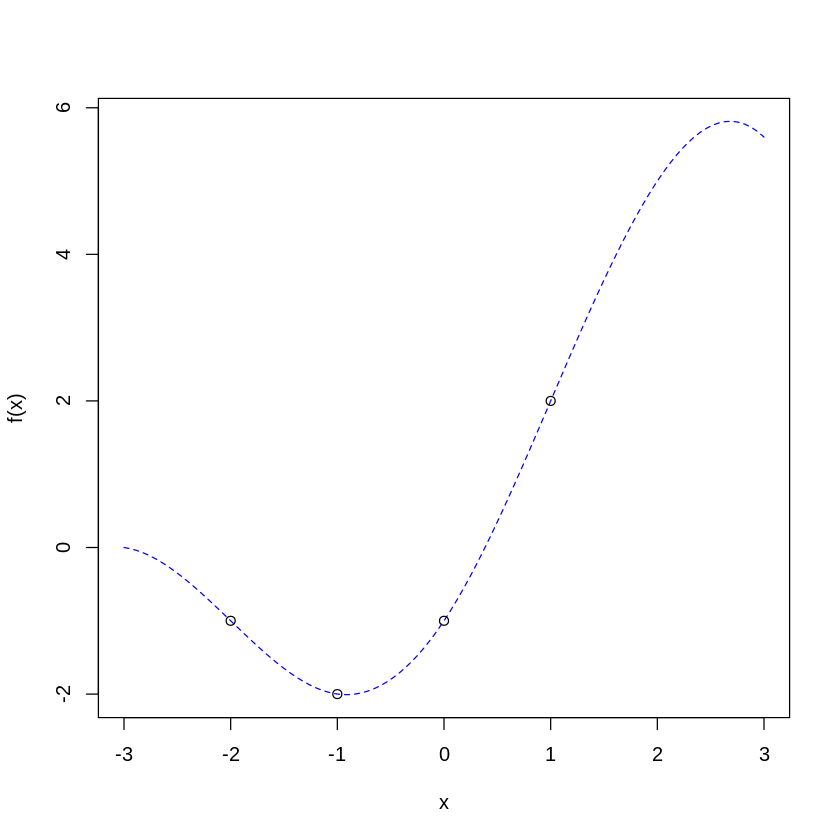

In [18]:
## test cubic spline for a small example 
x_obs = c(-2, -1, 0, 1)
y_obs = c(-1, -2, -1, 2)
f <- cubic.spline(x_obs,y_obs)      # fit cubic spline
curve(f,-3,3,lty=2,col="blue")
points(x_obs,y_obs)

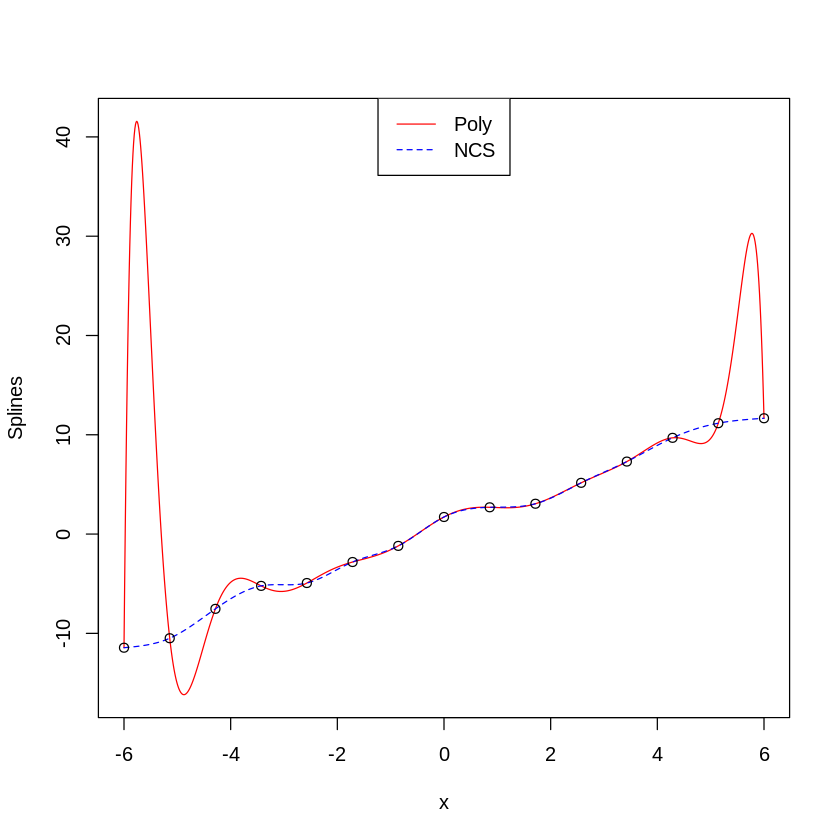

In [19]:
## Re-revisiting Runge's phenomenon
set.seed(1000) ## this is just for reproducible results
x_obs <- seq(-6,6,length=15) # 15 points between -6 and 6
y_obs <- 2*x_obs+1 + rnorm(length(x_obs)) # y=2x+1 with randomness

f_cubic <- cubic.spline(x_obs,y_obs)          # fit cubic spline
f_poly <- poly.interpolation.fun(x_obs,y_obs) # fit polynomial 
## curve takes a function and ranges of input 
curve(f_poly,-6,6,n=1000,lty=1,col="red",ylab="Splines")
## add=TRUE uses the same from/to arguments
curve(f_cubic,n=1000,add=TRUE,lty=2,col="blue")
## plot the observed points
points(x_obs,y_obs)
## add labels
legend("top",c("Poly","NCS"),lty=1:2,lwd=1,col=c("red","blue"))